In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV, KFold, train_test_split 
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve 
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
pd.set_option('display.max_columns', 50)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

nba_df=pd.read_csv('NBA Players Salaries 1920.csv')

In [3]:
nba_df.head()

,Rk,Player,Tm,2019-20,2020-21,2021-22,2022-23,2023-24,2024-25,Signed Using,Guaranteed
0,1,Stephen Curry\curryst01,GSW,40231758.00 $,43006362.00 $,45780966.00 $,NaN,NaN,NaN,Bird Rights,129019086.00 $
1,2,Chris Paul\paulch01,OKC,38506482.00 $,41358814.00 $,44211146.00 $,NaN,NaN,NaN,Bird Rights,79865296.00 $
2,3,Russell Westbrook\westbru01,HOU,38178000.00 $,41006000.00 $,43848000.00 $,46662000.00 $,NaN,NaN,Bird Rights,123032000.00 $
3,4,John Wall\walljo01,WAS,37800000.00 $,40824000.00 $,43848000.00 $,46872000.00 $,NaN,NaN,Bird Rights,122472000.00 $
4,5,James Harden\hardeja01,HOU,37800000.00 $,40824000.00 $,43848000.00 $,46872000.00 $,NaN,NaN,Bird Rights,122472000.00 $


## Assessing the Data

In [4]:
nba_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rk            568 non-null    int64 
 1   Player        568 non-null    object
 2   Tm            568 non-null    object
 3   2019-20       568 non-null    object
 4   2020-21       349 non-null    object
 5   2021-22       206 non-null    object
 6   2022-23       96 non-null     object
 7   2023-24       21 non-null     object
 8   2024-25       3 non-null      object
 9   Signed Using  455 non-null    object
 10  Guaranteed    568 non-null    object
dtypes: int64(1), object(10)
memory usage: 48.9+ KB


In [5]:
nba_df.isna().sum()/len(nba_df)*100 # check percentage of null value in each column

Rk               0.000000
Player           0.000000
Tm               0.000000
2019-20          0.000000
2020-21         38.556338
2021-22         63.732394
2022-23         83.098592
2023-24         96.302817
2024-25         99.471831
Signed Using    19.894366
Guaranteed       0.000000
dtype: float64

In [6]:
nba_df['Signed Using'].value_counts()

1st Round Pick         104
Minimum Salary          98
Cap Space               68
MLE                     54
Bird Rights             44
Cap space               22
1st Round pick          22
Room Exception          15
Sign and Trade          10
Early Bird Rights        9
Non-Bird Exception       2
Bi-annual Exception      2
1st round pick           1
Maximum Salary           1
Bi-Annual Exception      1
DPE                      1
MInimum Salary           1
Name: Signed Using, dtype: int64

From this, I observed that some of the values are repeated but seen as a different values due to cases used, I suggest converting all categorical columns to lower case

In [7]:
nba_df=nba_df.apply(lambda x: x.str.lower() if x.dtype=='object' else x)

In [8]:
nba_df['Player'].value_counts()

jeff green\greenje02                  3
gary clark\clarkga01                  3
joakim noah\noahjo01                  3
anthony tolliver\tollian01            3
alfonzo mckinnie\mckinal01            3
jaylen adams\adamsja01                2
jarrod uthoff\uthofja01               2
tyler cook\cookty01                   2
derrick walton\waltode01              2
jonah bolden\boldejo01                2
cameron payne\payneca01               2
mychal mulder\muldemy01               2
reggie jackson\jacksre01              2
justin anderson\anderju01             2
marquese chriss\chrisma01             2
michael kidd-gilchrist\kiddgmi01      2
markieff morris\morrima02             2
timothé luwawu-cabarrot\luwawti01     2
marvin williams\willima02             2
donta hall\halldo01                   2
dragan bender\bendedr01               2
david nwaba\nwabada01                 2
trey burke\burketr01                  2
patrick patterson\pattepa01           2
pau gasol\gasolpa01                   2


Since the percentage of null values in '2022-23','2023-24','2024-25' is above 80% This means that the columns has little or no contribution to the analysis and prediction

## Data Cleaning

In [9]:
float_col=['2019-20','2020-21','2021-22','2022-23','2023-24','2024-25','Guaranteed']
for col in float_col:
    nba_df[col]=nba_df[col].str[:-2].astype(float)

In [10]:
# let rectify col with null value
null_num_col=float_col[1:]
null_num_col

['2020-21', '2021-22', '2022-23', '2023-24', '2024-25', 'Guaranteed']

In [11]:
null_obj_col=nba_df.select_dtypes('object').columns
null_obj_col=null_obj_col[:-1]

In [12]:
for col in nba_df.columns:
    if col in (null_num_col):
        mean=nba_df[col].mean()
        nba_df[col]=nba_df[col].fillna(mean)
#     elif col in (null_obj_col):
#         mode=nba_df[col].mode()
#         nba_df[col]=nba_df[col].fillna(mode)
#     else:
#         nba_df[col]=nba_df[col]

In [13]:
mode=nba_df['Signed Using'].value_counts().index[1]

In [14]:
# let rectify col with null value
null_num_col=float_col[1:]
null_num_col=null_num_col[:-1]

In [15]:
null_obj_col=nba_df.select_dtypes('object').columns
null_obj_col=null_obj_col[:-1]

In [16]:
for col in nba_df.columns:
    if col in (null_num_col):
        mean=nba_df[col].mean()
        nba_df[col]=nba_df[col].fillna(mean)

In [17]:
mode=nba_df['Signed Using'].value_counts().index[0]
mode

'1st round pick'

In [18]:
nba_df['Signed Using']=nba_df['Signed Using'].fillna(mode)

In [19]:
nba_df.isna().sum()/len(nba_df)*100

Rk              0.0
Player          0.0
Tm              0.0
2019-20         0.0
2020-21         0.0
2021-22         0.0
2022-23         0.0
2023-24         0.0
2024-25         0.0
Signed Using    0.0
Guaranteed      0.0
dtype: float64

In [20]:
nba_df.head()

,Rk,Player,Tm,2019-20,2020-21,2021-22,2022-23,2023-24,2024-25,Signed Using,Guaranteed
0,1,stephen curry\curryst01,gsw,40231758.0,43006362.0,45780966.0,1.587481e+07,2.770237e+07,4.382333e+07,bird rights,129019086.0
1,2,chris paul\paulch01,okc,38506482.0,41358814.0,44211146.0,1.587481e+07,2.770237e+07,4.382333e+07,bird rights,79865296.0
2,3,russell westbrook\westbru01,hou,38178000.0,41006000.0,43848000.0,4.666200e+07,2.770237e+07,4.382333e+07,bird rights,123032000.0
3,4,john wall\walljo01,was,37800000.0,40824000.0,43848000.0,4.687200e+07,2.770237e+07,4.382333e+07,bird rights,122472000.0
4,5,james harden\hardeja01,hou,37800000.0,40824000.0,43848000.0,4.687200e+07,2.770237e+07,4.382333e+07,bird rights,122472000.0


In [21]:
nba_df.describe()

,Rk,2019-20,2020-21,2021-22,2022-23,2023-24,2024-25,Guaranteed
count,568.000000,5.680000e+02,5.680000e+02,5.680000e+02,5.680000e+02,5.680000e+02,5.680000e+02,5.680000e+02
mean,284.500000,6.665745e+06,9.384835e+06,1.153471e+07,1.587481e+07,2.770237e+07,4.382333e+07,1.725384e+07
std,164.111751,8.631017e+06,7.937921e+06,7.170667e+06,5.767763e+06,2.657466e+06,5.362899e+05,3.235645e+07
min,1.000000,5.000000e+04,9.285700e+04,9.285700e+04,9.285700e+04,9.285700e+04,3.861000e+07,5.000000e+04
25%,142.750000,1.416852e+06,3.613944e+06,1.153471e+07,1.587481e+07,2.770237e+07,4.382333e+07,1.618520e+06
50%,284.500000,2.625359e+06,9.384835e+06,1.153471e+07,1.587481e+07,2.770237e+07,4.382333e+07,4.771380e+06
75%,426.250000,8.583322e+06,9.384835e+06,1.153471e+07,1.587481e+07,2.770237e+07,4.382333e+07,1.579954e+07
max,568.000000,4.023176e+07,4.300636e+07,4.578097e+07,4.725000e+07,5.075000e+07,5.425000e+07,2.574293e+08


In [22]:
nba_df.nunique()

Rk              568
Player          526
Tm               30
2019-20         389
2020-21         257
2021-22         167
2022-23          82
2023-24          20
2024-25           3
Signed Using     12
Guaranteed      406
dtype: int64

In [23]:
nba_df['Player'].value_counts()

jeff green\greenje02                  3
gary clark\clarkga01                  3
joakim noah\noahjo01                  3
anthony tolliver\tollian01            3
alfonzo mckinnie\mckinal01            3
jaylen adams\adamsja01                2
jarrod uthoff\uthofja01               2
tyler cook\cookty01                   2
derrick walton\waltode01              2
jonah bolden\boldejo01                2
cameron payne\payneca01               2
mychal mulder\muldemy01               2
reggie jackson\jacksre01              2
justin anderson\anderju01             2
marquese chriss\chrisma01             2
michael kidd-gilchrist\kiddgmi01      2
markieff morris\morrima02             2
timothé luwawu-cabarrot\luwawti01     2
marvin williams\willima02             2
donta hall\halldo01                   2
dragan bender\bendedr01               2
david nwaba\nwabada01                 2
trey burke\burketr01                  2
patrick patterson\pattepa01           2
pau gasol\gasolpa01                   2


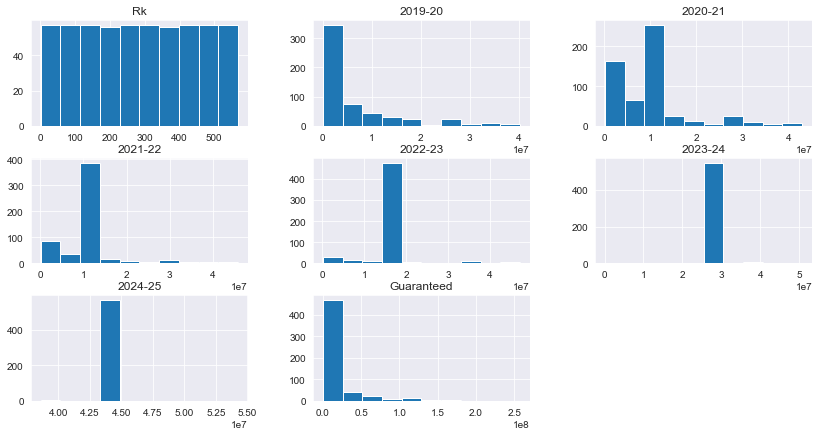

In [24]:
nba_df.hist(figsize=(14,7));

In [25]:
nba_df.skew().sort_values(ascending=False)

2024-25       9.755461
Guaranteed    3.323309
2021-22       2.193550
2020-21       1.926486
2019-20       1.872031
2022-23       1.833827
Rk            0.000000
2023-24      -2.757015
dtype: float64

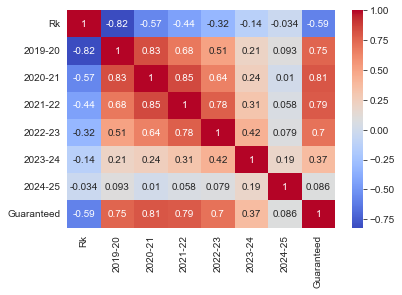

In [26]:
sb.heatmap(nba_df.corr(), cmap='coolwarm',annot=True);

In [27]:
nba_df['Tm'].value_counts()

mem    25
cle    25
brk    24
was    22
det    22
mil    21
hou    21
sac    21
atl    20
orl    20
gsw    20
por    19
lal    19
dal    18
tor    18
pho    18
uta    18
mia    18
bos    18
lac    17
sas    17
phi    17
okc    17
nyk    17
chi    16
nop    16
cho    16
den    16
ind    16
min    16
Name: Tm, dtype: int64

In [28]:
nba_df['Signed Using'].value_counts()

1st round pick         240
minimum salary          99
cap space               90
mle                     54
bird rights             44
room exception          15
sign and trade          10
early bird rights        9
bi-annual exception      3
non-bird exception       2
maximum salary           1
dpe                      1
Name: Signed Using, dtype: int64

Average salary paid to the player by Signed using in the year 2019-2020

In [29]:
average_salary_2020=nba_df.groupby('Signed Using', as_index=False).mean()
average_salary_2020.sort_values(by='2019-20',ascending=False)

,Signed Using,Rk,2019-20,2020-21,2021-22,2022-23,2023-24,2024-25,Guaranteed
6,maximum salary,10.000000,3.300556e+07,3.545041e+07,3.789527e+07,1.587481e+07,2.770237e+07,4.382333e+07,6.845597e+07
11,sign and trade,71.100000,2.155340e+07,2.082123e+07,2.165713e+07,2.514373e+07,2.770237e+07,4.382333e+07,6.683758e+07
2,bird rights,72.227273,2.052834e+07,2.015466e+07,2.047878e+07,2.093826e+07,2.883128e+07,4.382333e+07,6.026502e+07
3,cap space,170.500000,1.201671e+07,1.160843e+07,1.210816e+07,1.587048e+07,2.742990e+07,4.382333e+07,2.235695e+07
5,early bird rights,180.666667,6.970168e+06,8.193093e+06,1.091368e+07,1.511094e+07,2.770237e+07,4.382333e+07,1.264389e+07
0,1st round pick,310.579167,4.681596e+06,8.683457e+06,1.043190e+07,1.525525e+07,2.768530e+07,4.382333e+07,1.516408e+07
10,room exception,225.133333,4.311837e+06,5.144684e+06,1.153471e+07,1.587481e+07,2.770237e+07,4.382333e+07,6.657117e+06
9,non-bird exception,284.500000,3.566067e+06,5.584196e+06,1.153471e+07,1.587481e+07,2.770237e+07,4.382333e+07,3.566067e+06
1,bi-annual exception,257.000000,3.249333e+06,3.350333e+06,1.153471e+07,1.587481e+07,2.770237e+07,4.382333e+07,5.332667e+06
8,mle,363.407407,2.660791e+06,4.537110e+06,7.723901e+06,1.395358e+07,2.731251e+07,4.382333e+07,6.262407e+06


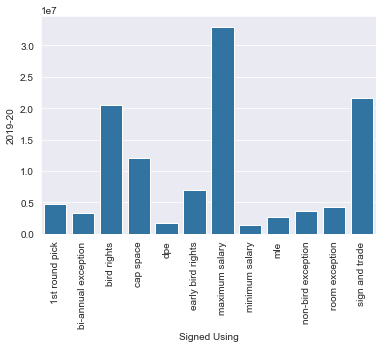

In [30]:
color=sb.color_palette()[0]
sb.barplot(data=average_salary_2020, x='Signed Using', y='2019-20',color=color);
plt.xticks(rotation=90);

In [31]:
#Team salary by Guaraneed
salary_team=nba_df.groupby('Tm',as_index=False).mean()
salary_team.sort_values(by='Guaranteed', ascending=False)

,Tm,Rk,2019-20,2020-21,2021-22,2022-23,2023-24,2024-25,Guaranteed
22,phi,264.705882,7.663126e+06,1.196329e+07,1.477556e+07,1.844292e+07,2.898653e+07,4.351667e+07,3.752332e+07
24,por,276.105263,7.312068e+06,9.244857e+06,1.292973e+07,1.714323e+07,2.803341e+07,4.437211e+07,2.844301e+07
7,den,259.500000,8.184138e+06,1.085560e+07,1.374069e+07,1.804101e+07,2.823785e+07,4.349750e+07,2.813372e+07
9,gsw,386.650000,6.576396e+06,1.025969e+07,1.194707e+07,1.719888e+07,2.847242e+07,4.382333e+07,2.809249e+07
11,ind,226.000000,7.169283e+06,9.510045e+06,1.086499e+07,1.598753e+07,2.730300e+07,4.382333e+07,2.511017e+07
17,min,253.500000,8.282040e+06,8.348304e+06,1.047406e+07,1.573507e+07,2.821910e+07,4.382333e+07,2.327004e+07
1,bos,284.000000,6.734756e+06,9.373418e+06,1.124958e+07,1.482137e+07,2.621332e+07,4.382333e+07,1.926416e+07
16,mil,264.476190,6.429806e+06,9.426867e+06,1.181768e+07,1.699890e+07,2.830686e+07,4.382333e+07,1.917100e+07
10,hou,337.714286,6.217378e+06,1.069182e+07,1.362741e+07,1.824271e+07,2.737930e+07,4.382333e+07,1.888811e+07
6,dal,249.666667,6.783171e+06,9.140565e+06,1.107980e+07,1.585854e+07,2.816425e+07,4.382333e+07,1.863201e+07


In [32]:
# let check the first ten players with high salary
player_salary=nba_df.groupby('Player', as_index=False).mean()
player_salary.sort_values(by='2019-20', ascending=False)[:10]

,Player,Rk,2019-20,2020-21,2021-22,2022-23,2023-24,2024-25,Guaranteed
455,stephen curry\curryst01,1.0,40231758.0,43006362.0,4.578097e+07,1.587481e+07,2.770237e+07,4.382333e+07,129019086.0
69,chris paul\paulch01,2.0,38506482.0,41358814.0,4.421115e+07,1.587481e+07,2.770237e+07,4.382333e+07,79865296.0
433,russell westbrook\westbru01,3.0,38178000.0,41006000.0,4.384800e+07,4.666200e+07,2.770237e+07,4.382333e+07,123032000.0
218,james harden\hardeja01,5.0,37800000.0,40824000.0,4.384800e+07,4.687200e+07,2.770237e+07,4.382333e+07,122472000.0
252,john wall\walljo01,4.0,37800000.0,40824000.0,4.384800e+07,4.687200e+07,2.770237e+07,4.382333e+07,122472000.0
323,lebron james\jamesle01,6.0,37436858.0,39219565.0,4.100227e+07,1.587481e+07,2.770237e+07,4.382333e+07,76656423.0
295,kevin durant\duranke01,7.0,37199000.0,39058950.0,4.091890e+07,4.277885e+07,2.770237e+07,4.382333e+07,117176850.0
34,blake griffin\griffbl01,8.0,34234964.0,36595996.0,3.895703e+07,1.587481e+07,2.770237e+07,4.382333e+07,70830960.0
311,kyle lowry\lowryky01,9.0,33296296.0,30000000.0,1.153471e+07,1.587481e+07,2.770237e+07,4.382333e+07,63296296.0
408,paul george\georgpa01,10.0,33005556.0,35450412.0,3.789527e+07,1.587481e+07,2.770237e+07,4.382333e+07,68455968.0


In [33]:
# renaming of values in signed using column
nba_df['Signed Using'] = nba_df['Signed Using'].replace(['Cap space', '1st round pick', '1st Round pick', 'MInimum Salary', 'Bi-Annual Exception', 'MLE', 'DPE'], 
                                               ['Cap Space', '1st Round Pick', '1st Round Pick', 'Minimum Salary', 'Bi-annual Exception', 'Mid-level Exception', 'Disable Player Exception'])

In [34]:
# rename columns
nba_df.rename(columns = {'Tm':'Team', 'Rk':'Rank'}, inplace=True)
nba_df.columns

Index(['Rank', 'Player', 'Team', '2019-20', '2020-21', '2021-22', '2022-23',
       '2023-24', '2024-25', 'Signed Using', 'Guaranteed'],
      dtype='object')

In [35]:
nba_df['Signed Using'].value_counts()

1st Round Pick         240
minimum salary          99
cap space               90
mle                     54
bird rights             44
room exception          15
sign and trade          10
early bird rights        9
bi-annual exception      3
non-bird exception       2
maximum salary           1
dpe                      1
Name: Signed Using, dtype: int64

In [36]:
nba_df.describe()

,Rank,2019-20,2020-21,2021-22,2022-23,2023-24,2024-25,Guaranteed
count,568.000000,5.680000e+02,5.680000e+02,5.680000e+02,5.680000e+02,5.680000e+02,5.680000e+02,5.680000e+02
mean,284.500000,6.665745e+06,9.384835e+06,1.153471e+07,1.587481e+07,2.770237e+07,4.382333e+07,1.725384e+07
std,164.111751,8.631017e+06,7.937921e+06,7.170667e+06,5.767763e+06,2.657466e+06,5.362899e+05,3.235645e+07
min,1.000000,5.000000e+04,9.285700e+04,9.285700e+04,9.285700e+04,9.285700e+04,3.861000e+07,5.000000e+04
25%,142.750000,1.416852e+06,3.613944e+06,1.153471e+07,1.587481e+07,2.770237e+07,4.382333e+07,1.618520e+06
50%,284.500000,2.625359e+06,9.384835e+06,1.153471e+07,1.587481e+07,2.770237e+07,4.382333e+07,4.771380e+06
75%,426.250000,8.583322e+06,9.384835e+06,1.153471e+07,1.587481e+07,2.770237e+07,4.382333e+07,1.579954e+07
max,568.000000,4.023176e+07,4.300636e+07,4.578097e+07,4.725000e+07,5.075000e+07,5.425000e+07,2.574293e+08


In [37]:
nba_df.dtypes

Rank              int64
Player           object
Team             object
2019-20         float64
2020-21         float64
2021-22         float64
2022-23         float64
2023-24         float64
2024-25         float64
Signed Using     object
Guaranteed      float64
dtype: object

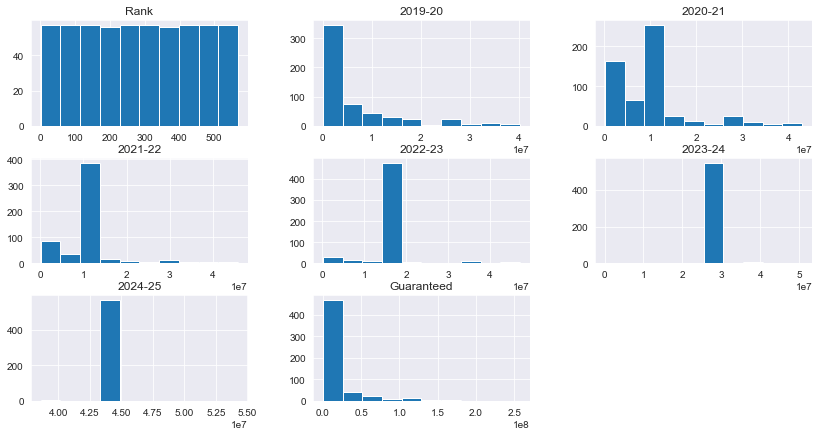

In [38]:
# histogram plot of the data
nba_df.hist(figsize=(14,7));

In [39]:
nba_df.skew().sort_values(ascending=False)

2024-25       9.755461
Guaranteed    3.323309
2021-22       2.193550
2020-21       1.926486
2019-20       1.872031
2022-23       1.833827
Rank          0.000000
2023-24      -2.757015
dtype: float64

### Machine Learning Model

In [40]:
# drop columns not needed for prediction
nba_df = nba_df.drop(['2022-23', '2023-24', '2024-25'], axis=1)

In [41]:
# converting categorical columns to numerical variables for training

cat_cols = ['Signed Using', 'Player', 'Team']

#load the LabelEncoder
labelencoder = LabelEncoder()
nba_df[cat_cols] = nba_df[cat_cols].apply(lambda col: labelencoder.fit_transform(col))

#Load OneHotEncoder
onehotencoder = OneHotEncoder()
array_hot_encoded = onehotencoder.fit_transform(nba_df[cat_cols])
data_hot_encoded = pd.DataFrame(array_hot_encoded, index=nba_df.index)

data_other_cols = nba_df.drop(columns = cat_cols)
data_out = pd.concat([data_hot_encoded, data_other_cols], axis=1)

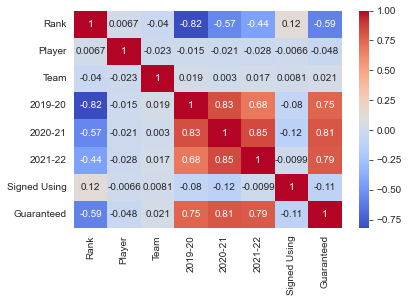

In [42]:
# display correlation between variables
sb.heatmap(nba_df.corr(), cmap='coolwarm', annot=True);

In [43]:
# normalize the dataset using min max scaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(nba_df), columns=nba_df.columns)

x = normalized_df[['Rank', 'Signed Using', 'Player', 'Team']]
y = normalized_df['2019-20']

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# split the normalized data into test and train set
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size = 0.3, random_state=42)

In [45]:
#Define our model
reg_model = LinearRegression()

# fit the model
reg_model.fit(x_train, y_train)

# predict on test set
predicted_value = reg_model.predict(x_test)

In [46]:
# find r2 score

from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_value)
round(r2_score, 2)

0.65

In [47]:
# evaluating the model based on mean absolute error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_value)
round(mae, 2)

0.09

In [48]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_value))
round(rmse, 3)

0.129

In [49]:
# calculate RSS value
residual = np.sum((y_test - predicted_value)**2)
round(residual, 2)

2.83

### Predicting the 2020 salaries based on previous salary 2019 and rank of the player

In [50]:
# predicting the 2020 salaries based on previous salary 2019 and rank of the player

x1 = normalized_df[['Rank','2019-20']]
y1 = normalized_df['2020-21']

# split the normalized data into test and train set
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, train_size=0.7, test_size = 0.3, random_state=42)

In [51]:
#Define our model
linear_model = LinearRegression()

# fit the model
linear_model.fit(x1_train, y1_train)

# predict on test set
pred_value = linear_model.predict(x1_test)

# evaluating the model based on mean absolute error
from sklearn.metrics import mean_absolute_error
mae1 = mean_absolute_error(y1_test, pred_value)
print("The mean absolute error is ", round(mae1, 2))

The mean absolute error is  0.07
